# waves

In [27]:
#import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import pandas as pd
from IPython.display import display

**main variables**
<br> f - main frequency (Hz)
<br> frangemax - x axis length of Fourier-transform
<br> samples - sample points of the first graph
<br> randamp - amplitude of noise (random noise)

In [28]:
f=200
frangemax=400
samples=2000
randamp=7

x = np.linspace(0.0, 1, samples)
sin = np.sin(f*2*np.pi*x)
rand = (np.random.rand(samples)-0.5)*randamp
s=(sin+rand)/(0.5*randamp+1)

Above we create our signal and noise. In deafult: a sine wave, and a white noise.

In [29]:
usewidgets=0
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=20

The widget above controls the wisible range of the chart below. Note that this is only for visualisation, the program calculates with the whole 0 - 1 range. The zooming is exponential. Value 0 displays the whole range.

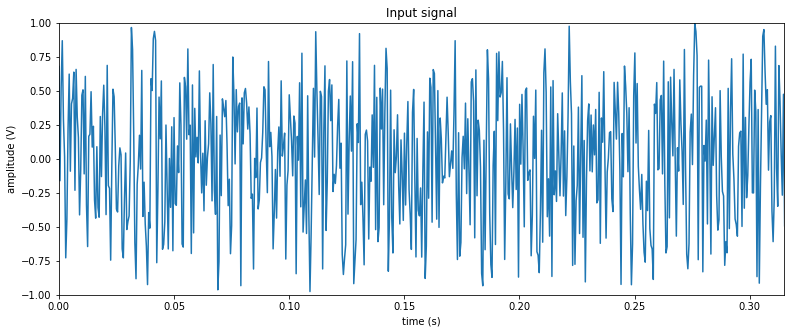

In [30]:
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
yaxismax=1/2**(view.value/12)
plt.axis([0,yaxismax,-1,1])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

yf = scipy.fftpack.fft(s)
xf = np.linspace(0.0, frangemax, frangemax)
nyquist=samples/2

Now we take the Fourier-transform of the signal abowe, what has been already calculated, and make 3 plots:
 - One displaying the Real and imaginery parts of the vectors generated by Fourier at the corresponding frequencies
 - Next displaying their absolute values - we wil use these absolute values in the future
 - And one displaying the rotation of these vectors on the imaginary plane

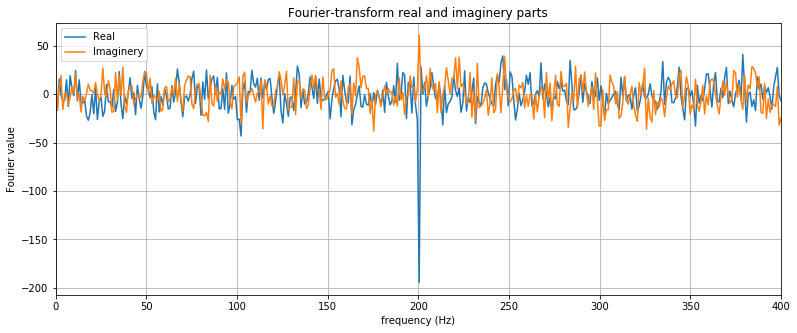

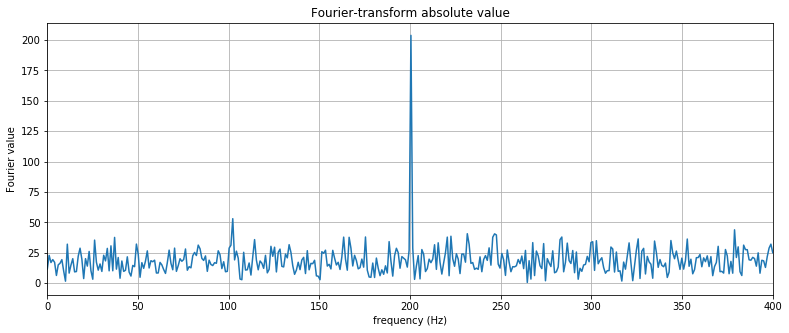

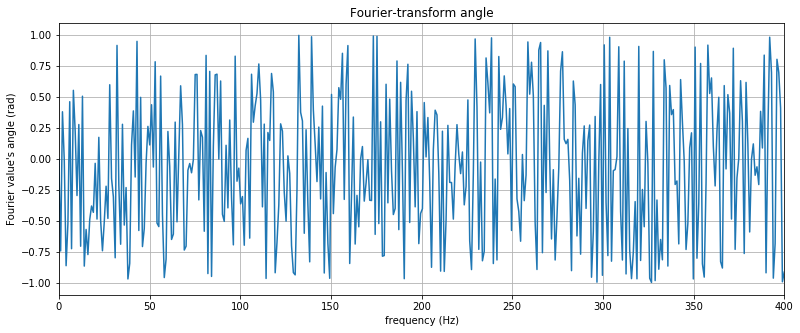

In [31]:
yfabs=np.abs(yf[:frangemax])
yfang=np.angle(yf[:frangemax])
yfimag=np.imag(yf[:frangemax])
yfreal=np.real(yf[:frangemax])

plt.figure(figsize=(13,5))
plt.plot(xf,yfimag,xf,yfreal)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform real and imaginery parts')
plt.grid(True)
plt.legend(('Real', 'Imaginery'))
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfang/np.pi)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)') 
plt.ylabel("Fourier value's angle (rad)")
#plt.xscale('log')
plt.title('Fourier-transform angle')
plt.grid(True)
plt.show()

Now, we will seek the peaks of the 2nd graph: we will search for the most likely original frequencies. We will find the 5 biggest values, and display their Fourier (absolute) values.

In [33]:
#print (np.average(np.abs(yf)))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    yfmaxsum=yfmaxsum+yfsort[frangemax-i-1]
    for j in range(frangemax):
        if yfsort[frangemax-i-1] == yfabs[j]:
            fout[i]=j
    #print (fout[i],"  ",yfabs[fout[i]])
#print (np.max(np.abs(yf)))

d = {'Frequency (Hz)': [fout[0],fout[1],fout[2],fout[3],fout[4]], 'Fourier amplitude': [yfabs[fout[0]],yfabs[fout[1]],yfabs[fout[2]],yfabs[fout[3]],yfabs[fout[4]]]}
df = pd.DataFrame(data=d)
display (df)

deviation=np.std(yfabs)
certainity=yfabs[fout[0]]/deviation

yfsum=np.sum(yfabs*yfabs)
certainity2=yfabs[fout[0]]*yfabs[fout[0]]/yfsum
   
if fout[0]==f:
    print ('We have succesfully found our original frequency:', f ,'Hz')
    print ('\nConfidence using square sum:', 100*certainity2, '%')
    print ('Confidence using standard deviation:', certainity)
else:
    print ("We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.")

,Frequency (Hz),Fourier amplitude
0,200,203.872426
1,102,53.097595
2,378,43.948764
3,231,40.740742
4,246,40.614929


We have succesfully found our original frequency: 200 Hz

Confidence using square sum: 20.275566859074356 %
Confidence using standard deviation: 15.889896243260276


Tasks
<br> Noise and det. component F-transform
<br> Fourier dimension
<br> make Git ignore